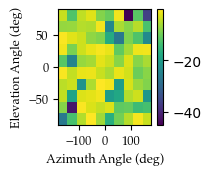

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def mag2db(magnitude):
    return 20 * np.log10(np.abs(magnitude))

def plotRCS_2D(rcspat, az, el, note):
    # Set the paper size and figure properties
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    
    # Plot the RCS pattern
    cax = ax.imshow(mag2db(rcspat), extent=[az.min(), az.max(), el.min(), el.max()], origin='lower', aspect='auto')
    fig.colorbar(cax)
    
    # Set labels with specified font and size
    ax.set_xlabel('Azimuth Angle (deg)', fontsize=9, fontname='Palatino')
    ax.set_ylabel('Elevation Angle (deg)', fontsize=9, fontname='Palatino')
    
    # Set the font for the ticks
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Palatino')
        label.set_fontsize(9)
    
    # Save the figure to a PDF file without the title
    #plt.savefig(f'{note}.pdf', format='pdf', bbox_inches='tight')

# Example usage
# Assuming `rcspat`, `az`, and `el` are defined, for example:

az = np.linspace(-180, 180, 10) # Example azimuth angles
el = np.linspace(-90, 90, 10)   # Example elevation angles
rcs = np.random.rand(len(el), len(az))
note = 'RCS_Pattern'
plotRCS_2D(rcs, az, el, note)


/var/folders/13/__pnhh1j11d7t5c39gxw6j5m0000gn/T/ipykernel_8342/1972069860.py:18: RuntimeWarning: divide by zero encountered in log10
  rcsdb = 10 * np.log10(np.abs(rcs))


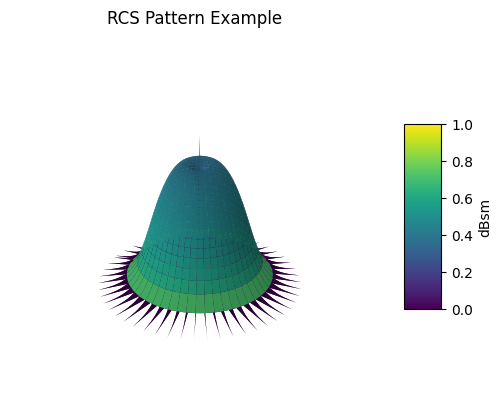

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def helperTargetRCSPatternPlot(az, el, rcs, note):
    """
    This function plots the RCS pattern as a 3D surface.
    Arguments:
    az -- azimuth angles in degrees
    el -- elevation angles in degrees
    rcs -- RCS values
    note -- plot title
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    az_grid, el_grid = np.meshgrid(np.deg2rad(az), np.deg2rad(el))
    # Convert RCS to dBsm
    rcsdb = 10 * np.log10(np.abs(rcs))
    # Define floor (dB)
    minthresh = np.max(rcsdb) - 100
    rcsdb[rcsdb < minthresh] = minthresh
    r = rcsdb - minthresh  # Radius must be positive
    x, y, z = sph2cart(az_grid, el_grid, r)
    surf = ax.plot_surface(x, y, z, facecolors=plt.cm.viridis((rcsdb-minthresh)/np.max(rcsdb-minthresh)), edgecolor='none')
    ax.axis('off')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5).set_label('dBsm')
    plt.title(note)
    plt.show()

def sph2cart(az, el, r):
    """
    Convert spherical to Cartesian coordinates.
    """
    x = r * np.cos(el) * np.cos(az)
    y = r * np.cos(el) * np.sin(az)
    z = r * np.sin(el)
    return x, y, z

# Example usage
#az = np.linspace(-180, 180, 360)
#el = np.linspace(-90, 90, 180)
#rcs = np.random.rand(len(el), len(az))  # Example RCS data

from scipy.io import loadmat

# Load MATLAB file
data = loadmat('rcs_data.mat')

# Extract variables
rcs_cone = data['rcs_cone']
az_cone = data['az_cone']
el_cone = data['el_cone']

# Now you can use rcs_cone, az_cone, and el_cone in your Python code


helperTargetRCSPatternPlot(az_cone, el_cone, rcs_cone, "RCS Pattern Example")
